### KNN
- 유유상종 : 끼리끼리 모인다
- K개의 가장 가까이 존재하는 데이터를 기준으로 결과를 알고리즘
- 데이터와 데이터의 거리를 도출해서 거리 순으로 정렬
- K개 만큼 가까이 있는 데이터 도출
    => 분류: 다수결 원칙으로 많은 종류의 데이터 결론 도출
    => 회귀: 데이터의 평균값으로 결과 도출
- 특징: 데이터의 규칙/패턴을 나타내는 수식 없음, 데이터를 메모리 모두 저장 후 거리를 측정해서 결과 도출 => 게으른 학습

## Scikit-learn 패키지
- 기계학습 방법
  (1) 학습 모델 인스턴스 생성
  (2) 학습 메서드 => fit(2D(데이터), 1D(라벨))
  (3) 테스트 메서드 => score(2D, 1D)
  (4) 활용 메서드 => predict(2D) ---> 결과

### 목표: 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 피 쳐 : Weight, Length
- 타 겟 : Speices
- 유 형 : 지도학습 / 분류

(1) 모듈 로딩 & 데이터

In [279]:
import pandas as pd                                 # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier  # 기계학습 관련 모듈

In [280]:
data_file = '../data/fish.csv'

In [281]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])

fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [282]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt'])  # Boolean Indexing

# 해당 행만 도출
twoFishDF = fishDF[mask]
twoFishDF.index

# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)
twoFishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [307]:
## Bream, Smelt 품종명을 수치화
twoFishDF.loc[:,'Species'] = twoFishDF['Species'].replace({'Bream':0, 'Smelt':1}).copy()
twoFishDF.head()

,Species,Weight,Length
10,0,475.0,31.0
5,0,450.0,29.7
35,1,6.7,9.8
48,1,19.9,15.0
28,0,850.0,36.0


(2) 데이터 전처리

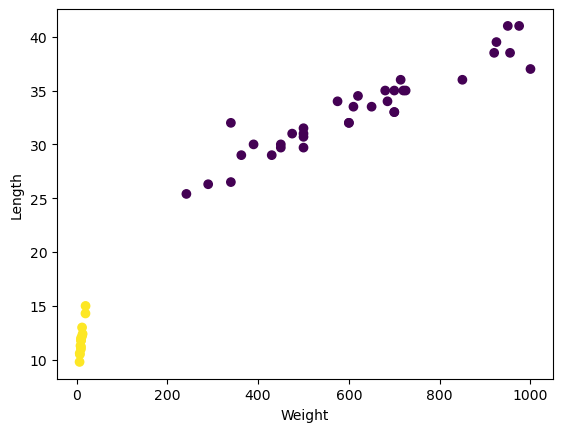

In [284]:
# Weight, Length로 품종 구별이 가능한지 시각화 확인
import matplotlib.pyplot as plt

plt.scatter(x=twoFishDF.Weight, y=twoFishDF.Length, c=twoFishDF.Species)
plt.xlabel("Weight")
plt.ylabel("Length")
plt.show()

(3) 기계학습을 위한 데이터 준비
 - 피쳐/특성 + 타겟/라벨/클래스
 - 학습용 데이터셋   : 75%
 - 테스트용 데이터셋 : 25%

(3-1) 직접 타겟/라벨 컬럼의 비율을 고려해서 학습&테스트용 데이터셋 준비

In [285]:
# 데이터 섞기 => 100% 모두 섞기
twoFishDF = twoFishDF.sample(frac=1.)

print(twoFishDF.shape)
twoFishDF

(49, 3)


,Species,Weight,Length
10,0,475.0,31.0
5,0,450.0,29.7
35,1,6.7,9.8
48,1,19.9,15.0
28,0,850.0,36.0
13,0,340.0,32.0
4,0,430.0,29.0
43,1,9.8,12.0
17,0,700.0,33.0
31,0,955.0,38.5


In [286]:
# 학습과 테스트 비율 조절 갯수 계산
num = round(twoFishDF.shape[0] * 0.8)

# 갯수 39개를 맞추는데 loc를 하면 num만 쓰고 iloc는 인덱스 번호로 갯수를 잡기에 +1을 붙힘
# 학습 데이터셋 추출
trainDF = twoFishDF.iloc[:num+1]
print(f'trainDF => {trainDF.shape}\n {trainDF.tail(3)}')

# 테스트 데이터셋 추출
testDF = twoFishDF.iloc[num+1:]
print(f'\ntestDF => {testDF.shape}\n {testDF.tail(3)}')

trainDF => (40, 3)
     Species  Weight  Length
34        0   950.0    41.0
39        1     9.8    11.2
25        0   725.0    35.0

testDF => (9, 3)
     Species  Weight  Length
6         0   500.0    29.7
47        1    19.7    14.3
33        0   975.0    41.0


(3-2) scikit-learn 모듈 활용한 학습&테스트용 데이터셋 준비
- 추가 모듈 로딩

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
# 특성과 티겟 분리
featureDF = twoFishDF[twoFishDF.columns[1:]]
targetSR = twoFishDF.Species

print(f'featureDF => {featureDF.shape}\n{featureDF.head(2)}')
print(f'targetSR => {targetSR.shape}\n{targetSR.head(2)}')

featureDF => (49, 2)
    Weight  Length
10   475.0    31.0
5    450.0    29.7
targetSR => (49,)
10    0
5     0
Name: Species, dtype: int64


In [289]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [전달] 피쳐 데이터, 타겟 데이터
## -- [기본] shuffle=True
## -- [설정] train:test = 0.9:0.1 => test_size, train_size 매개변수 값 설정
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.1)

In [290]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(X_train.head(2), y_train.head(2), sep='\n')
print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')
print(X_test.head(2), y_test.head(2), sep='\n')

# 타겟/클래스 비율
print(f'{y_train.value_counts()/y_train.shape[0]}')
print(f'{y_test.value_counts()/y_test.shape[0]}')

X_train : (44, 2), y_train : (44,)
    Weight  Length
4    430.0    29.0
29  1000.0    37.0
4     0
29    0
Name: Species, dtype: int64
X_test : (5, 2), y_test : (5,)
    Weight  Length
3    363.0    29.0
32   925.0    39.5
3     0
32    0
Name: Species, dtype: int64
Species
0    0.681818
1    0.318182
Name: count, dtype: float64
Species
0    1.0
Name: count, dtype: float64


In [291]:
## -- 비율 설정 하는 학습/테스트셋 분리
## -- [전달] 피쳐 데이터, 타겟 데이터
## -- [기본] shuffle=True
## -- [설정] train:test = 0.9:0.1 => test_size, train_size 매개변수 값 설정
## --        분류의 경우 target이 불균형일 경우 비율 지정하는 stratify 매개변수를 target으로 설정
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.1, stratify=targetSR)

In [292]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
#print(X_train.head(2), y_train.head(2), sep='\n')

print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')
#print(X_test.head(2), y_test.head(2), sep='\n')

# 타겟/클래스 비율
print(f'{y_train.value_counts()/y_train.shape[0]}')
print(f'{y_test.value_counts()/y_test.shape[0]}')

X_train : (44, 2), y_train : (44,)
X_test : (5, 2), y_test : (5,)
Species
0    0.704545
1    0.295455
Name: count, dtype: float64
Species
0    0.8
1    0.2
Name: count, dtype: float64


In [293]:
### 검증용 데이터셋 준비 -> 학습용 데이터셋에서 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.1, stratify=y_train)

In [294]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')

print(f'X_val : {X_val.shape}, y_val : {y_val.shape}')

print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')

X_train : (39, 2), y_train : (39,)
X_val : (5, 2), y_val : (5,)
X_test : (5, 2), y_test : (5,)


(4) 학습 진행
- 학습 방법 : 지도학습 / 분류 => KNN
- 모델 인스턴스 생성 => fit() 메서드

In [295]:
# 모델 인스턴스 생성
model=KNeighborsClassifier()
model

KNeighborsClassifier()

In [296]:
# 학습 진행 => 학습용 데이터 진행
model.fit(X_train, y_train)

KNeighborsClassifier()

(5) 테스트 진행 => 학습에 사용되지 않는 데이터로 진행

In [297]:
model.score(X_val, y_val)

1.0

(6) 모델 활용 예측 => 새로운 데이터로 진행

In [298]:
model.predict(X_test)

array([0, 0, 1, 0, 0], dtype=int64)

In [299]:
y_test

7     0
17    0
37    1
21    0
3     0
Name: Species, dtype: int64

(6-1) 사용자로부터 전달받은 새로운 데이터에 대한 예측
==> 학습할 때 전달되는 피쳐형탱와 동일한 데이터

In [300]:
## 길이 25, 무게, 160인 생선의 품종 예측
new_data = pd.DataFrame([[160, 25]], columns=twoFishDF.columns[1:])

new_data

,Weight,Length
0,160,25


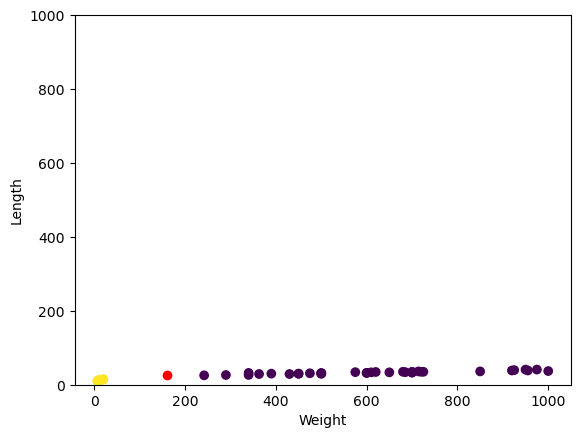

In [306]:
# 새로운 데이터와 학습 데이터의 시각화
plt.plot(new_data.Weight, new_data.Length, 'ro')

# 학습 데이터 시각화
plt.scatter(twoFishDF.Weight, twoFishDF.Length, c=twoFishDF.Species)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.ylim(0, 1000)
plt.show()

In [302]:
# 생성된 모델로 새로운 데이터 품종 예측
model.predict(new_data)

array([1], dtype=int64)

In [304]:
# 새로운 데이터의 최근접 데이터 추출
_, index = model.kneighbors(new_data)

index.tolist()[0]

[26, 4, 18, 2, 25]

In [305]:
twoFishDF.iloc[index.tolist()[0]]

,Species,Weight,Length
27,0,714.0,36.0
28,0,850.0,36.0
30,0,920.0,38.5
35,1,6.7,9.8
26,0,720.0,35.0
